In [22]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from pydlm import dlm, autoReg, trend
from pydlm import modelTuner
from EDMtoolkit import *
from modelSystems import *

%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
x0 = np.array([1,5,9],dtype=float)

b1 = lambda t: 3 + 5 * t / 2**10
# Xr = standardize(generateTimeSeriesContinuous("HastingsPowellP", x0, nsargs=(b1,), tlen=2**7, end=2**10, reduction=64, settlingTime=2**10)[:,0])
Xr = standardize(generateTimeSeriesContinuous("HastingsPowell", x0, tlen=2**8, end=2**9, reduction=64, settlingTime=2**10)[:,0])

<IPython.core.display.Javascript object>


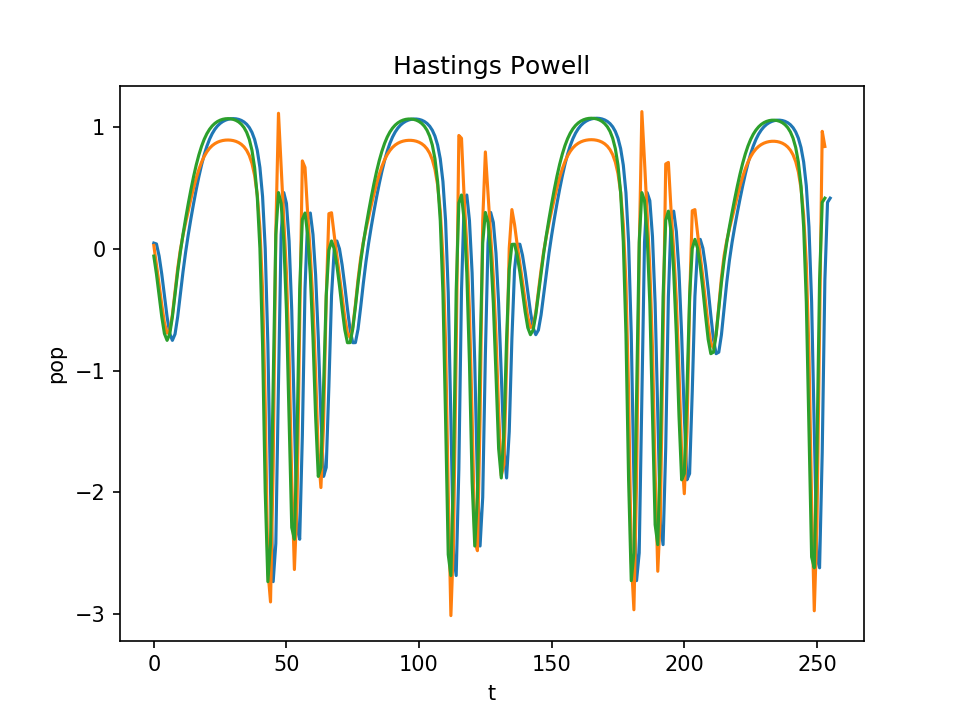

In [26]:
plotTS(Xr, title="Hastings Powell")

In [27]:
X, Y, tx = delayEmbed(Xr, 1, 1, 1, t=np.linspace(0,1,num=2**8))

In [28]:
optimizeG(X, Y, tx, fixed=np.array([True, False]), hp=np.array([0,100]))

(0, 539, 21.3654003924695)

In [29]:
plt.plot(leaveOneOut(X, Y, tx, 0, 0))
plt.plot(Y)

In [30]:
lDLM = dlm(Xr.flatten()) + autoReg(discount=0.8,degree=10,name="AutoReg") # + trend(degree=0,discount=0.7,name="const")

In [31]:
tuner = modelTuner(method="gradient_descent", loss="mse")

lDLM = tuner.tune(lDLM, maxit=1000)
tuner.getDiscounts()

Initializing models...
Initialization finished.
The algorithm stops without converging.
Possible reason: some discount is too close to 1 or 0.7 (0.7 is smallest discount that is permissible.


[0.99999]

In [21]:
lDLM.getall()

AttributeError: 'dlm' object has no attribute 'getall'

In [ ]:
lDLM.fit()

In [ ]:
lDLM.plot()

In [ ]:
# fit forward filter
# lDLM.fitForwardFilter()
# fit backward smoother
# lDLM.fitBackwardSmoother()

# plot the results
lDLM.plot()
# plot only the filtered results
lDLM.turnOff('smoothed plot')
lDLM.plot()
# plot in one figure
lDLM.turnOff('multiple plots')
lDLM.turnOff('filtered plot')
lDLM.plot()

In [ ]:
lDLM.plot()

In [165]:
lDLM.getMSE()


2.2653463425941553

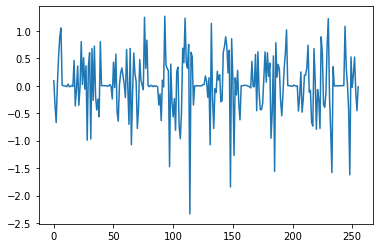

In [166]:
residual = lDLM.getResidual()

plt.plot(residual)

plt.show()

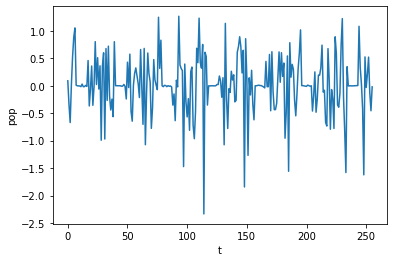

In [167]:
plotTS(residual)

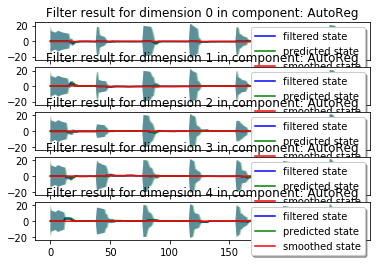

In [168]:
lDLM.plotCoef("AutoReg")

In [123]:
X, Y = delayEmbed(Xr, 1, 5, 1)
la.svd(X)

(array([[-3.42855541e-04,  8.35675189e-03,  1.40408186e-02, ...,
          2.28621837e-02,  1.95777942e-02,  8.49262411e-03],
        [-2.35473485e-03,  1.23612295e-02,  1.13398416e-02, ...,
          4.32834572e-02,  9.40141097e-03, -1.33221420e-02],
        [-5.12439149e-03,  1.52562753e-02,  1.04643878e-02, ...,
         -1.37944967e-01, -8.19393271e-02, -4.34629304e-02],
        ...,
        [-3.46902904e-02, -1.25725892e-01,  1.04922942e-01, ...,
          9.37425940e-01, -3.60007849e-02,  3.69454479e-03],
        [-1.34194710e-02, -9.52216695e-02,  1.39234274e-01, ...,
         -3.62450335e-02,  9.42409427e-01, -2.68498219e-02],
        [ 2.60807396e-03, -5.67108271e-02,  1.19138333e-01, ...,
          3.16058991e-03, -2.70590441e-02,  9.54552909e-01]]),
 array([5.20720257e+01, 1.83755507e+01, 4.40123233e+00, 7.91989165e-01,
        1.86353552e-01, 3.97014963e-02]),
 array([[ 0.38026224,  0.41288127,  0.43023478,  0.43015896,  0.41269575,
          0.38009632],
        [-0.580177